<a href="https://colab.research.google.com/github/GeneralHassaan/Projects/blob/main/K_means_hassaan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Hassaan Asif

In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [16]:
filename = '/content/cust_seg.csv'
df = pd.read_csv(filename)


df.head()



,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


Text(0, 0.5, 'Card Debt')

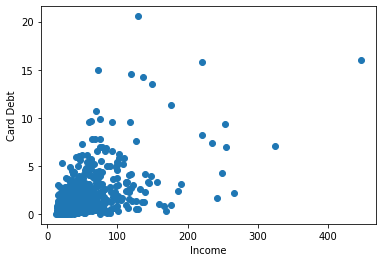

In [20]:
plt.scatter(df['Income'], df['Card Debt'])
plt.xlabel('Income')
plt.ylabel('Card Debt')

In [22]:
print(df.isna().sum())

Unnamed: 0           0
Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64


In [26]:
df.dropna(inplace = True)

In [27]:
print(df.isna().sum())

Unnamed: 0         0
Customer Id        0
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64


In [30]:
df.duplicated().any()

False

In [31]:

# scaling data

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [32]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)

KMeans(n_clusters=2)

Text(0, 0.5, 'inertia')

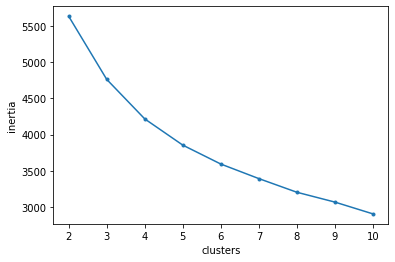

In [33]:
inertias = []
#Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(scaled_df)  
    inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

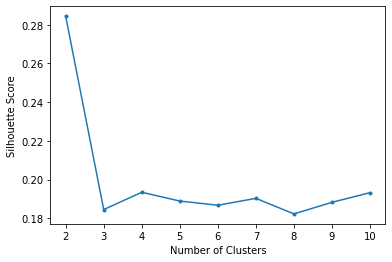

In [37]:
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [ ]:
# 2 would be the best number of clusters.

In [38]:
means = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)


0.17936891386093998

In [39]:
kmeans2 = KMeans(n_clusters = 2)
kmeans3 = KMeans(n_clusters = 3)
kmeans2.fit(scaled_df)
kmeans3.fit(scaled_df)

KMeans(n_clusters=3)

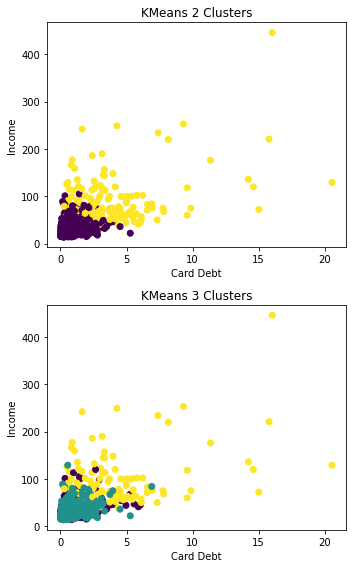

In [40]:
df['cluster2'] = kmeans2.labels_
df['cluster3'] = kmeans3.labels_
# Visualize the clusters
fig, axes = plt.subplots(2,1, figsize=(5,8))
axes[0].scatter(df['Card Debt'], df['Income'], c = df['cluster2'])
axes[0].set_xlabel('Card Debt')
axes[0].set_ylabel('Income')
axes[0].set_title('KMeans 2 Clusters')
axes[1].scatter(df['Card Debt'], df['Income'], c = df['cluster3'])
axes[1].set_xlabel('Card Debt')
axes[1].set_ylabel('Income')
axes[1].set_title('KMeans 3 Clusters')
plt.tight_layout();
